# data exploration



In [ ]:
#look at extreme values of sale price
# few more plots- maybe some categorical ones

# some feature engineering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys 
import os
sys.path.append(os.path.abspath("../src"))

import functions as fnc

In [2]:
plt.style.use('tableau-colorblind10')

In [3]:
train = pd.read_csv('../data/train.csv')
test =  pd.read_csv('../data/test.csv')


In [4]:
train.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

## target analysis

In [5]:
__TARGET__ = 'SalePrice'

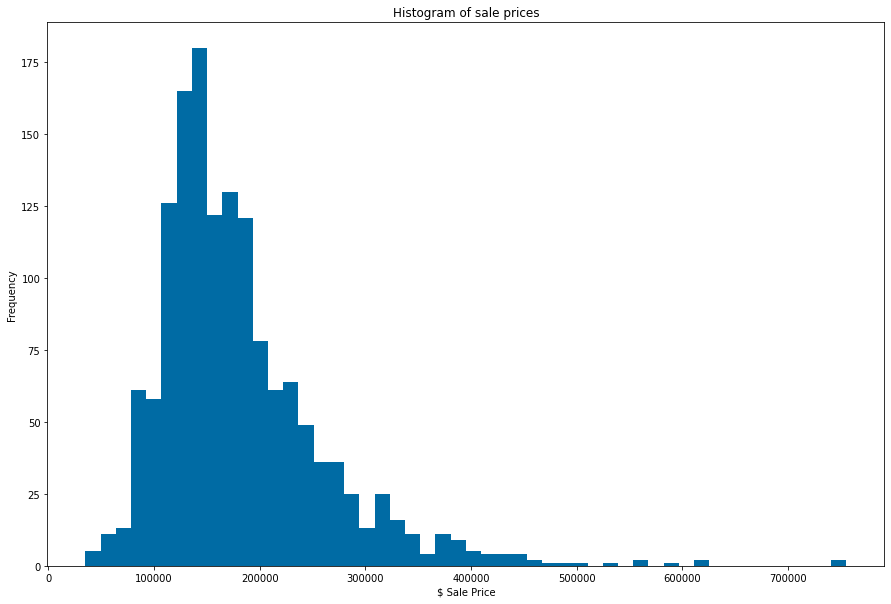

In [6]:
train[__TARGET__].plot(kind='hist', title = 'Histogram of sale prices',  bins= 50, figsize= (15,10));
plt.xlabel('$ Sale Price');

In [30]:
import seaborn as sns

In [50]:
def plot_pretty_boxplot(data, 
                        x, 
                        y=None, 
                        stripplot=True, 
                        plotting_params = {},
                        boxplot_args = {"width": 0.4, "color": "#2596be", "linewidth": 2, "showfliers": False}, 
                        stripplot_args = {"color": "#ffa500", "linewidth": 1, "alpha": 0.4}, 
                        sns_args = {"style": "ticks", "rc": {"figure.figsize": (6, 9)}}):
    sns.set(**sns_args)  
    # Box plot
    b = sns.boxplot(data = train,           
                        x = x,  
                    y = y,
                    orient = 'v',
                        **boxplot_args)  
    # strip plot
    if stripplot:
        b = sns.stripplot(data = train,          
                          x = x,   
                      y = y,
                          **stripplot_args) 
        
    #tidy plot
    if 'xlabel' in plotting_params.keys():
        b.set_xlabel(plotting_params['xlabel'], fontsize = 14)
    else:
        b.set_xlabel(x, fontsize = 14)

    if 'ylabel' in plotting_params.keys():
        b.set_ylabel(plotting_params['ylabel'], fontsize = 14)
    else:
        b.set_ylabel(x, fontsize = 14)

    if 'title' in plotting_params.keys():
        b.set_title(plotting_params['title'], fontsize = 14)
    else:
        if y is None:
            title = 'Boxplot for {}'.format(x)
        else:
            title = 'Boxplot of {} for categories of {}'.format(y,x)
        b.set_title(title, fontsize = 14)
        
    sns.despine(offset = 5, trim = True)
    b.get_figure();
    

/Users/jack/anaconda3/envs/titanic_venv/lib/python3.8/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


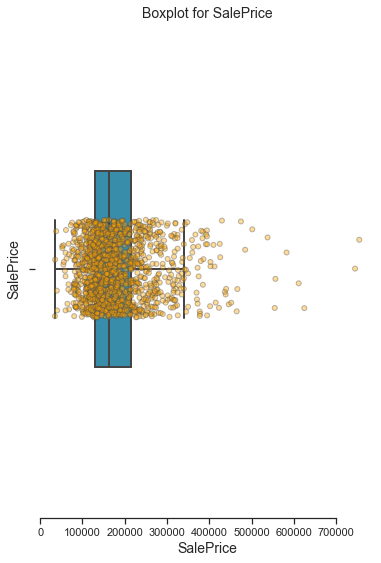

In [51]:
plot_pretty_boxplot(train, __TARGET__, plotting_params={'ylabel': 'SalePrice'})

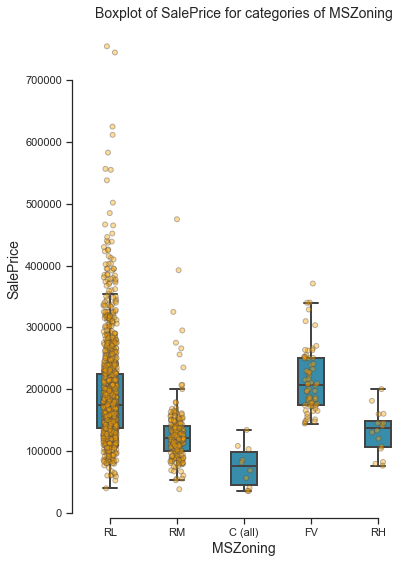

In [53]:
plot_pretty_boxplot(train, 'MSZoning', y=__TARGET__ ,  plotting_params={'ylabel': 'SalePrice'})

In [28]:
train[__TARGET__].describe().to_frame('value').round(2)

value
count    1460.0
mean   180921.2
std     79442.5
min     34900.0
25%    129975.0
50%    163000.0
75%    214000.0
max    755000.0

In [9]:
descriptions = pd.read_csv('../data/short_descs.txt', sep= ':',header=None)
descriptions.columns = ['field', 'description']
descriptions.head(5)

field                                        description
0    SalePrice   the property's sale price in dollars. This is...
1   MSSubClass                                 The building class
2     MSZoning                  The general zoning classification
3  LotFrontage        Linear feet of street connected to property
4      LotArea                            Lot size in square feet

In [10]:
#check to see if there are fields with only one value- we can get rid of them
train.nunique(dropna = False).to_frame('n_unique').sort_values(by='n_unique')

n_unique
CentralAir         2
Street             2
Utilities          2
PavedDrive         3
Alley              3
...              ...
1stFlrSF         753
BsmtUnfSF        780
GrLivArea        861
LotArea         1073
Id              1460

[81 rows x 1 columns]

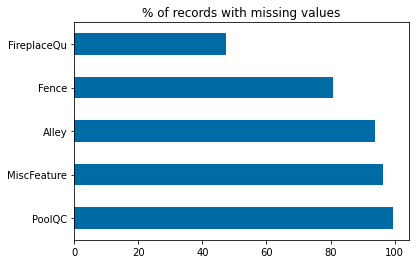

In [11]:
missing_pcts = (100*train.isnull().sum()/train.shape[0]).to_frame('% Missing').sort_values(by='% Missing', ascending= False)
missing_pcts.loc[missing_pcts['% Missing']>40, '% Missing'].plot(kind='barh', title='% of records with missing values');

In [12]:
pd.set_option('display.max_rows', 85)
feature_types = train.dtypes.to_frame('dtypes')
feature_types

dtypes
Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
Street          object
Alley           object
LotShape        object
LandContour     object
Utilities       object
LotConfig       object
LandSlope       object
Neighborhood    object
Condition1      object
Condition2      object
BldgType        object
HouseStyle      object
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
RoofStyle       object
RoofMatl        object
Exterior1st     object
Exterior2nd     object
MasVnrType      object
MasVnrArea     float64
ExterQual       object
ExterCond       object
Foundation      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinSF1       int64
BsmtFinType2    object
BsmtFinSF2       int64
BsmtUnfSF        int64
TotalBsmtSF      int64
Heating         object
HeatingQC       object
CentralAir      object
Electrical      object
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
GrLivArea        int64
BsmtFullBath     int64
BsmtHalfBath     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
KitchenQual     object
TotRmsAbvGrd     int64
Functional      object
Fireplaces       int64
FireplaceQu     object
GarageType      object
GarageYrBlt    float64
GarageFinish    object
GarageCars       int64
GarageArea       int64
GarageQual      object
GarageCond      object
PavedDrive      object
WoodDeckSF       int64
OpenPorchSF      int64
EnclosedPorch    int64
3SsnPorch        int64
ScreenPorch      int64
PoolArea         int64
PoolQC          object
Fence           object
MiscFeature     object
MiscVal          int64
MoSold           int64
YrSold           int64
SaleType        object
SaleCondition   object
SalePrice        int64

In [13]:
descriptions[descriptions['field'].str.contains('Kit')]

field          description
52      Kitchen   Number of kitchens
53  KitchenQual      Kitchen quality

In [14]:
# are there any sneaky categorical variables that are hiding as an int?
# interesting that there are fields missing in their short descriptions...

train.loc[:,train.dtypes == 'int'].nunique().to_frame('n_unique').sort_values(by='n_unique').merge(descriptions, 
                                                                                                   left_index=True, 
                                                                                                   right_on='field', 
                                                                                                   how='left')

n_unique          field  \
48.0         3   BsmtHalfBath   
50.0         3       HalfBath   
47.0         4   BsmtFullBath   
56.0         4     Fireplaces   
49.0         4       FullBath   
NaN          4   KitchenAbvGr   
61.0         5     GarageCars   
77.0         5         YrSold   
71.0         8       PoolArea   
NaN          8   BedroomAbvGr   
18.0         9    OverallCond   
17.0        10    OverallQual   
54.0        12   TotRmsAbvGrd   
76.0        12         MoSold   
1.0         15     MSSubClass   
69.0        20      3SsnPorch   
75.0        21        MiscVal   
45.0        24   LowQualFinSF   
20.0        61   YearRemodAdd   
70.0        76    ScreenPorch   
19.0       112      YearBuilt   
68.0       120  EnclosedPorch   
36.0       144     BsmtFinSF2   
67.0       202    OpenPorchSF   
66.0       274     WoodDeckSF   
44.0       417       2ndFlrSF   
62.0       441     GarageArea   
34.0       637     BsmtFinSF1   
0.0        663      SalePrice   
38.0       721    TotalBsmtSF   
43.0       753       1stFlrSF   
37.0       780      BsmtUnfSF   
46.0       861      GrLivArea   
4.0       1073        LotArea   
NaN       1460             Id   

                                            description  
48.0                            Basement half bathrooms  
50.0                             Half baths above grade  
47.0                            Basement full bathrooms  
56.0                               Number of fireplaces  
49.0                         Full bathrooms above grade  
NaN                                                 NaN  
61.0                     Size of garage in car capacity  
77.0                                          Year Sold  
71.0                           Pool area in square feet  
NaN                                                 NaN  
18.0                           Overall condition rating  
17.0                Overall material and finish quality  
54.0   Total rooms above grade (does not include bat...  
76.0                                         Month Sold  
1.0                                  The building class  
69.0             Three season porch area in square feet  
75.0                    $Value of miscellaneous feature  
45.0      Low quality finished square feet (all floors)  
20.0                                       Remodel date  
70.0                   Screen porch area in square feet  
19.0                         Original construction date  
68.0                 Enclosed porch area in square feet  
36.0                        Type 2 finished square feet  
67.0                     Open porch area in square feet  
66.0                      Wood deck area in square feet  
44.0                           Second floor square feet  
62.0                      Size of garage in square feet  
34.0                        Type 1 finished square feet  
0.0    the property's sale price in dollars. This is...  
38.0                 Total square feet of basement area  
43.0                            First Floor square feet  
37.0            Unfinished square feet of basement area  
46.0       Above grade (ground) living area square feet  
4.0                             Lot size in square feet  
NaN                                                 NaN

In [15]:
int_cats = [ 'OverallCond', 'OverallQual', 'MoSold', 'MSSubClass']

In [16]:
data_dict = {}
data_dict['categorical'] = feature_types[feature_types['dtypes']=='object'].index.to_list() + int_cats
data_dict['continuous'] = [i for i in feature_types.index.to_list() if i not in data_dict['categorical'] and i not in ['Id', 'SalePrice']]

In [17]:
set(train.columns.to_list()) - set(data_dict['categorical'] + data_dict['continuous'])

{'Id', 'SalePrice'}

In [18]:
data_dict['categorical']

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'OverallCond',
 'OverallQual',
 'MoSold',
 'MSSubClass']

In [168]:
# ratio bathrooms to bedrooms
# 1 - (lot area - house area) / lot area   (what % of lot is covered by house)
# house age
# 
data_dict['continuous']

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold']

## looking at categorical

In [19]:
def summary_per_category(df, cat_field, cont_field):
    df2 = df.copy()
    df2.loc[df2[cat_field].isnull(), cat_field] = 'MISSING'
    summary = df.groupby(cat_field)[cont_field].agg(['mean', 'min', 'max', 'median'])
    return summary

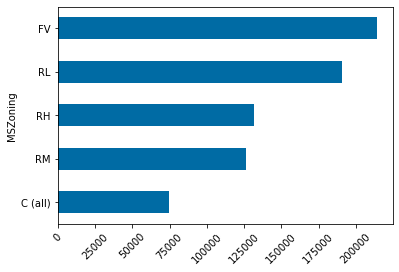

In [20]:
summary_per_category(train, 'MSZoning', 'SalePrice').sort_values(by='mean')['mean'].plot(kind='barh');
plt.xticks(rotation=45);

## continuous

In [21]:
data_dict['continuous']

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold']

In [22]:
def plot_scatter(df, col1, col2):
    plt.scatter(train[col1], train[col2]);
    plt.xlabel(col1);
    plt.ylabel(col2);
    plt.title('scatter plot of {} vs. {}'.format(col1, col2));
    plt.show();
    return None

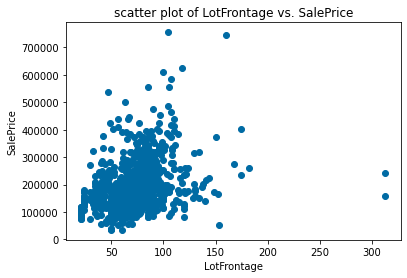

In [23]:
plot_scatter(train, 'LotFrontage', 'SalePrice')

## looking at date cols

### sale price per year built

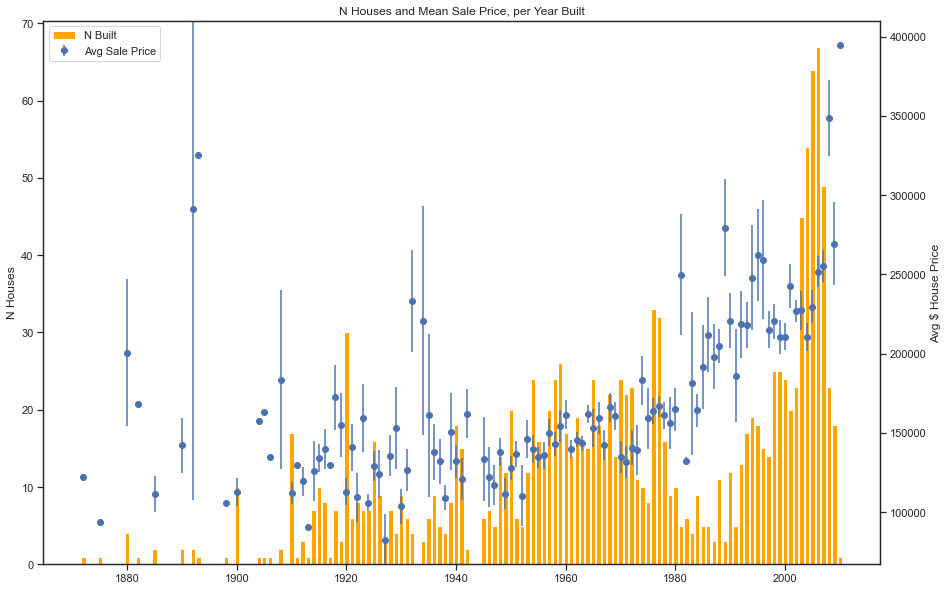

In [179]:
year_built_summary = train.groupby('YearBuilt')['SalePrice'].agg(['mean', 'std', 'count'])
year_built_summary['std_err'] = year_built_summary['std']/ year_built_summary['count']**0.5
year_built_summary.fillna(0)

fig, ax1 = plt.subplots(figsize = (15,10));
ax2 = ax1.twinx()
ax2.errorbar(year_built_summary.index, year_built_summary['mean'], yerr=year_built_summary['std_err'], fmt = 'o', label = 'Avg Sale Price');

ax1.bar(year_built_summary.index, year_built_summary['count'], color='orange', alpha = 1, label = 'N Built');

#stupid that you have to do this to create a neat legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)


ax2.set_ylabel('Avg $ House Price');
ax1.set_ylabel('N Houses');
ax2.set_xlabel('Year Built')
plt.title('N Houses and Mean Sale Price, per Year Built');

### sale price per year of sale

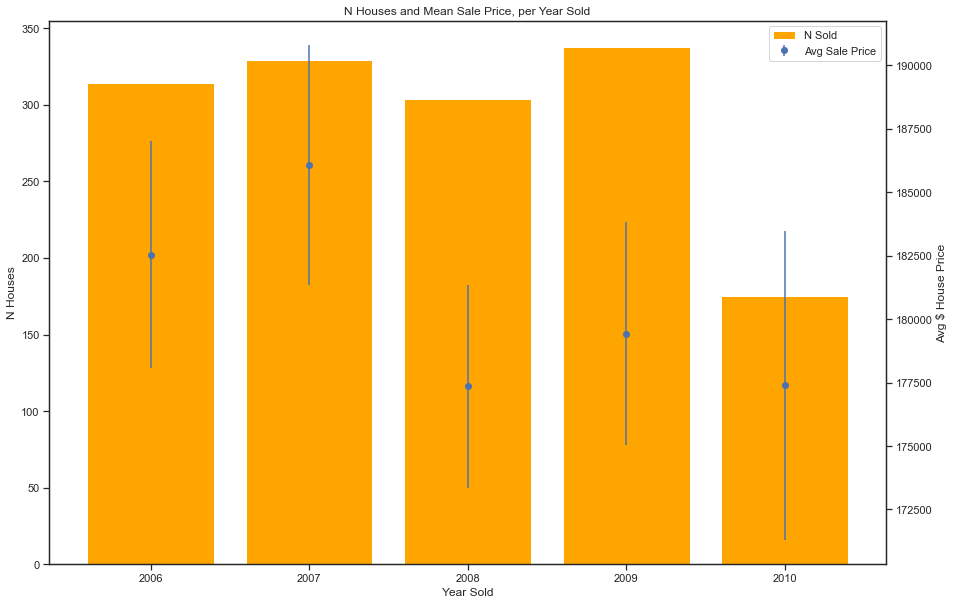

In [184]:
year_built_summary = train.groupby('YrSold')['SalePrice'].agg(['mean', 'std', 'count'])
year_built_summary['std_err'] = year_built_summary['std']/ year_built_summary['count']**0.5
year_built_summary.fillna(0)

fig, ax1 = plt.subplots(figsize = (15,10));
ax2 = ax1.twinx()

ax1.bar(year_built_summary.index, year_built_summary['count'], color='orange', alpha = 1, label = 'N Sold' );
ax2.errorbar(year_built_summary.index, year_built_summary['mean'], yerr=year_built_summary['std_err'], fmt = 'o', label = 'Avg Sale Price' );

#stupid that you have to do this to create a neat legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)



ax2.set_ylabel('Avg $ House Price');
ax1.set_ylabel('N Houses');
ax1.set_xlabel('Year Sold');
plt.title('N Houses and Mean Sale Price, per Year Sold');

In [185]:
year_built_summary

mean           std  count      std_err
YrSold                                                 
2006    182549.458599  79426.838855    314  4482.315829
2007    186063.151976  85768.171410    329  4728.552355
2008    177360.838816  69735.610685    304  3999.611576
2009    179432.103550  80879.237311    338  4399.250551
2010    177393.674286  80451.280085    175  6081.545136

In [119]:
temp['MoSold'].value_counts(dropna = False)

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

### kde per month of sale

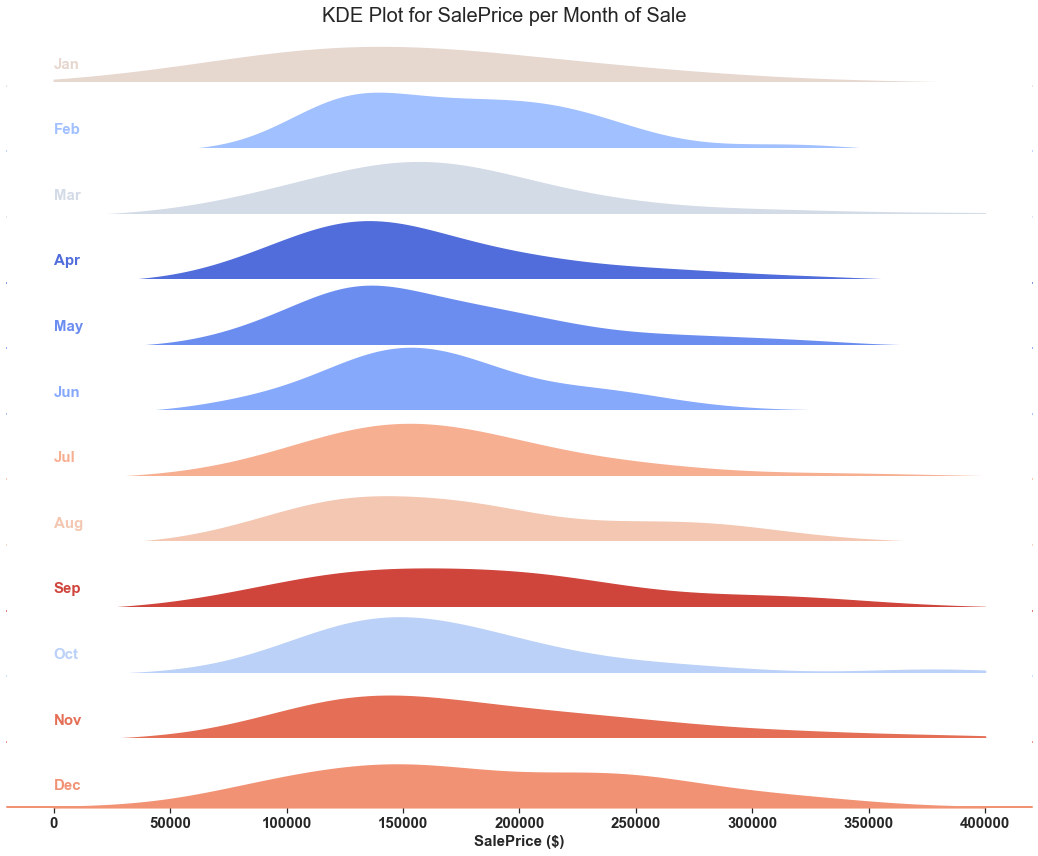

In [178]:
month_dict = {1: 'Jan',
              2: 'Feb',
              3: 'Mar',
              4: 'Apr',
              5: 'May',
              6: 'Jun',
              7: 'Jul',
              8: 'Aug',
              9: 'Sep',
              10: 'Oct',
              11: 'Nov',
              12: 'Dec'}

# we generate a pd.Serie with the mean temperature for each month (used later for colors in the FacetGrid plot), and we create a new column in temp dataframe
temp = train.copy()
month_mean_serie = temp.groupby('MoSold')[__TARGET__].mean()
temp['mean_month'] = temp['MoSold'].map(month_mean_serie)

pal = sns.color_palette(palette='coolwarm', n_colors=12)

g = sns.FacetGrid(temp, 
                  row='MoSold', 
                  hue='mean_month', 
                  aspect=15, 
                  height= 1, 
                  palette=pal);


# then we add the densities kdeplots for each month
g.map(sns.kdeplot, __TARGET__,
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5, clip= (0, 400000) );

g.map(sns.kdeplot, __TARGET__, 
      bw_adjust=1, clip_on=False, 
      color="w", lw=0.01, clip= (0, 400000));

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False);


g.fig.subplots_adjust(hspace=-0.05);
g.set_titles("");
g.set(yticks=[]);
#g.set(xticks=[]);
g.despine(bottom=True, left=True);


for i,a in enumerate(g.axes):
    a[0].set_ylabel('')

for i, ax in enumerate(g.axes.flat):
    ax.text(-15, 0.000002, month_dict[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    
    

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('SalePrice ($)', fontweight='bold', fontsize=15)
g.fig.suptitle('KDE Plot for SalePrice per Month of Sale',
               #ha='right',
               fontsize=20,
               fontweight=20);

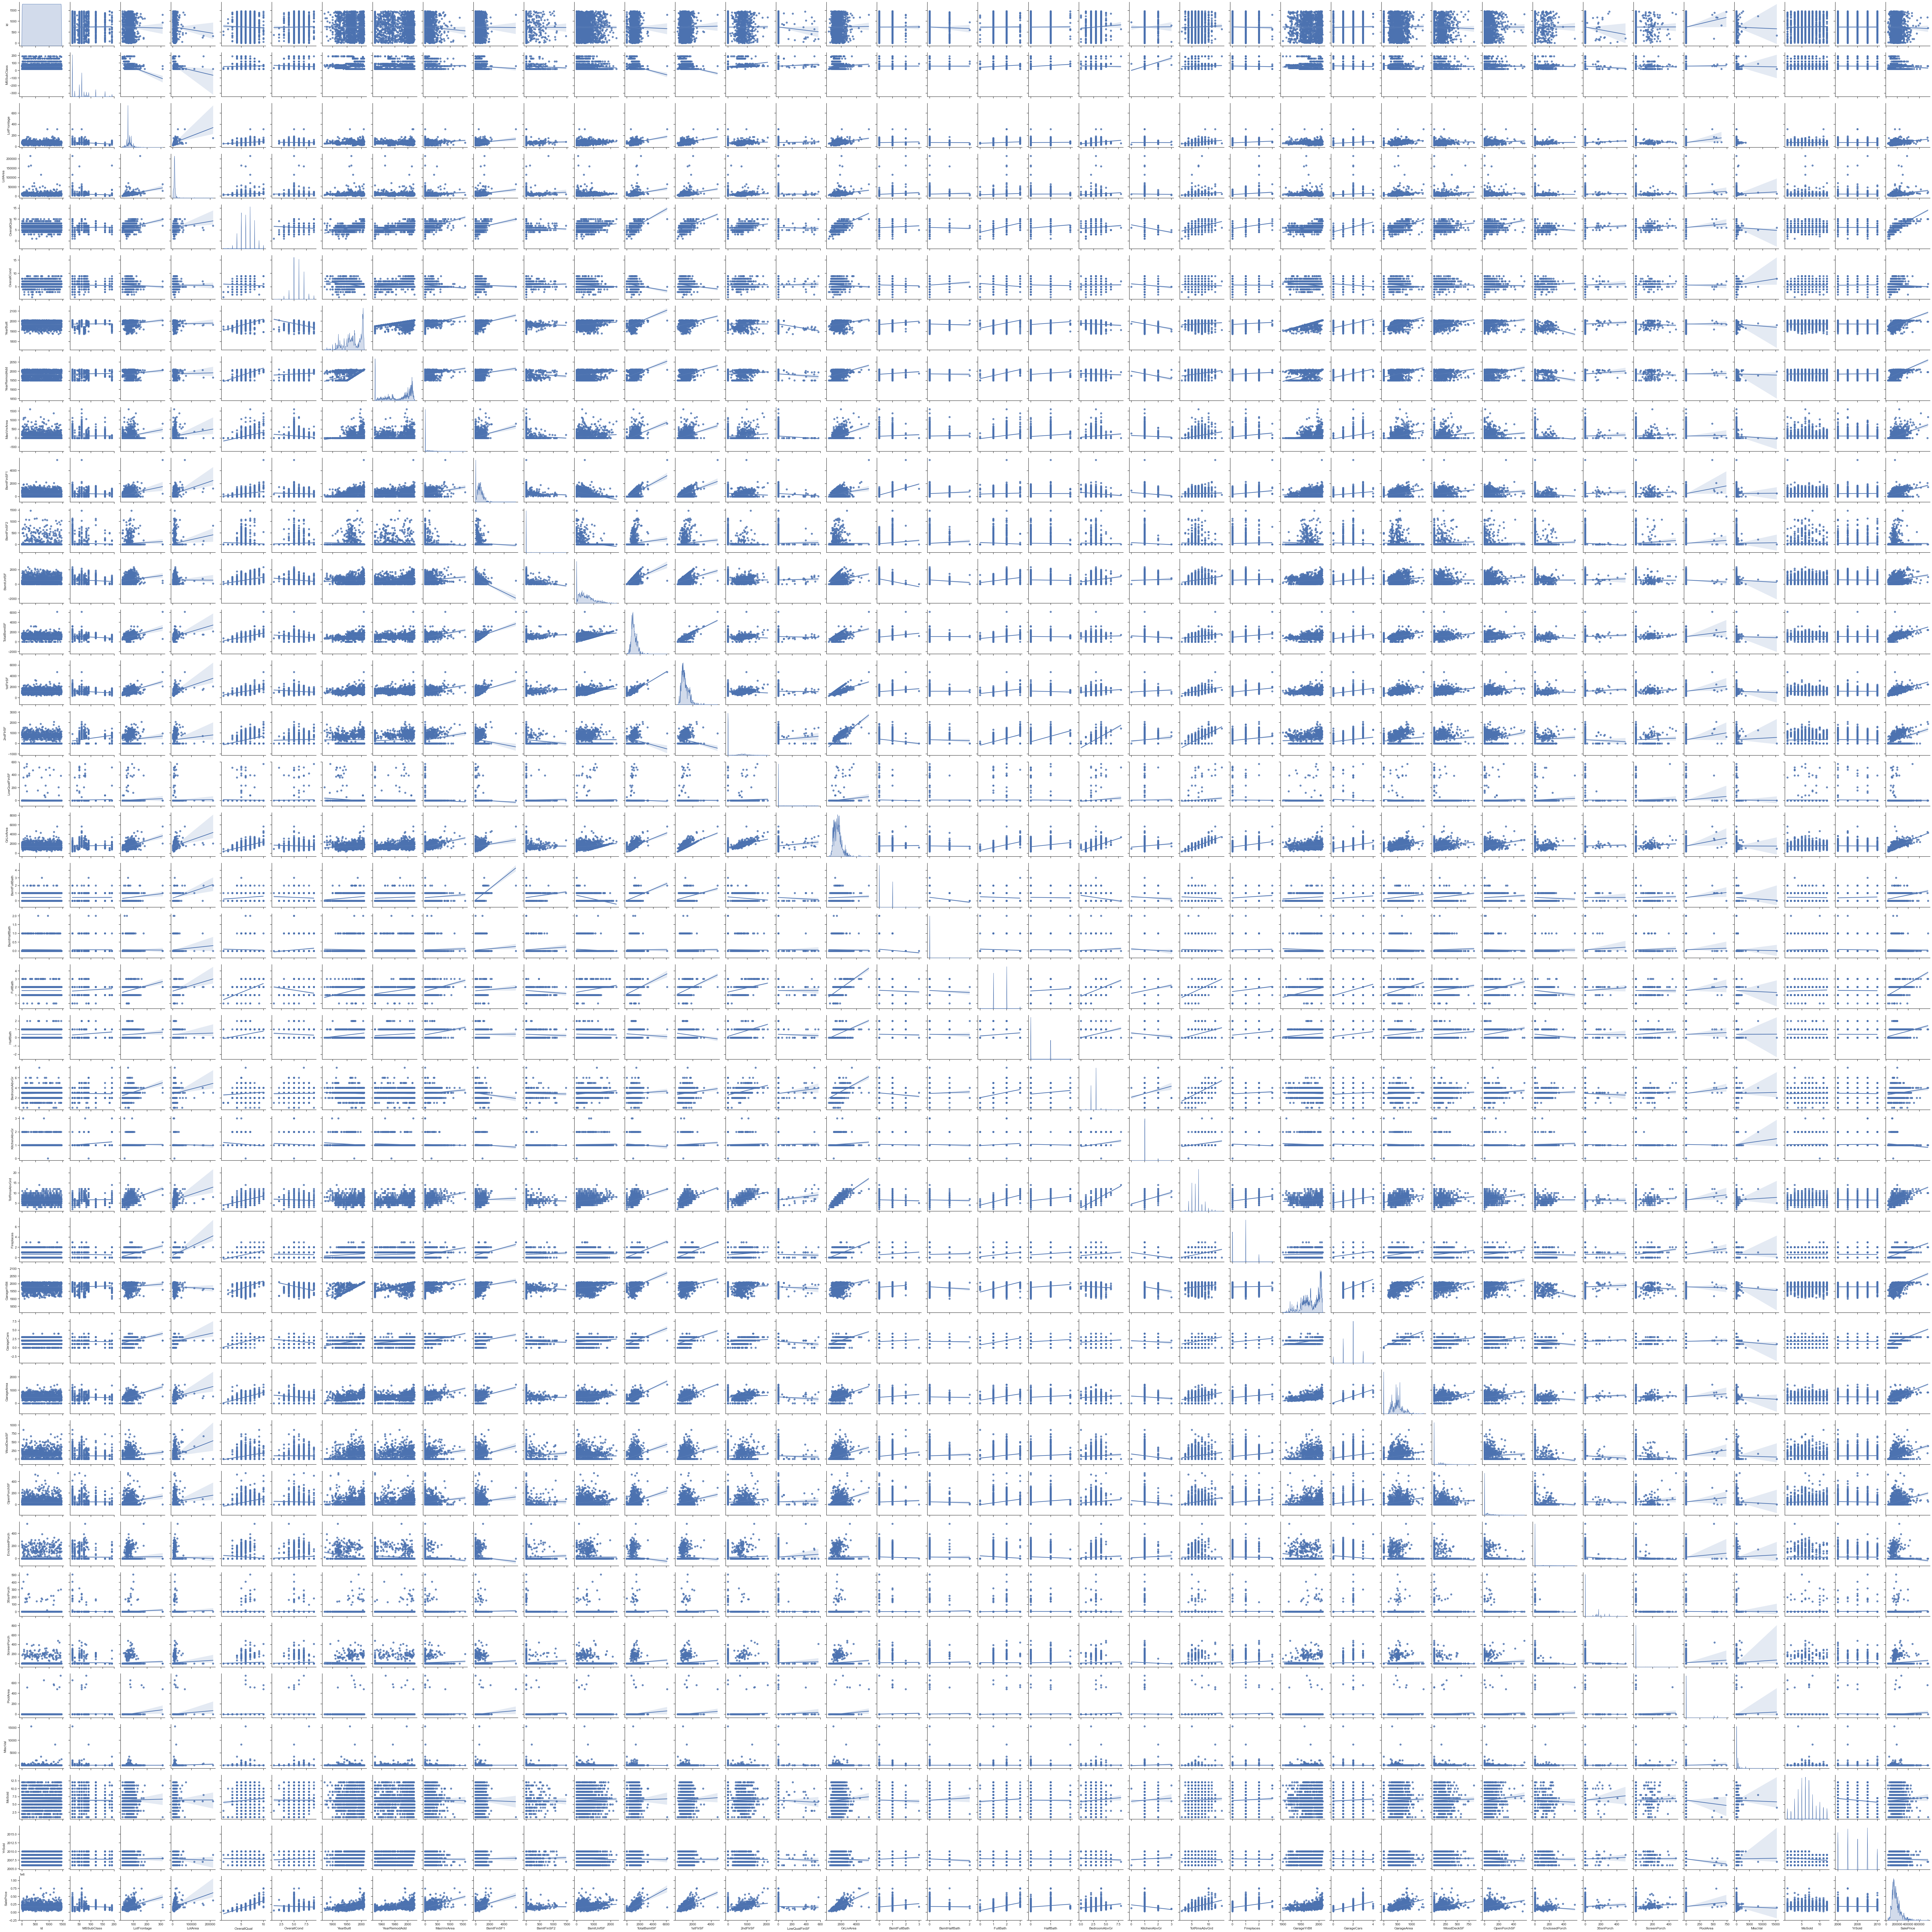

In [182]:
sns.pairplot(train, 
             kind='reg', 
             diag_kind="kde", 
             diag_kws=dict(shade=True, bw_adjust=.05, vertical=False))